# 数値解析第６回課題

### 学籍番号：08B22182　氏名：平山聖輝

課題6

$$
f(x) = x^3 - 8x^2 - 15x + 54 = 0
$$

の解 $ x $ をニュートン・ラフソン法で求めることを考える． <br>
初期値を $ x^{(0)} = 1 $ とした場合と，$ x^{(0)} = -1 $ とした場合の両方について，１回目の繰り返しの近似値 $ x^{(1)} $ および２回目の繰り返しの近似値 $ x^{(2)} $ を求めよ．

ニュートン・ラフソン法とは
$$ f(x) = 0 $$
の近似解を $ x^{(k)} $ ，真の解 $ x $ との誤差を $ h^{(k)} = x - x^{(k)} $ としたとき，
$$ f(x) = 0 $$
$$ \rightarrow f(x^{(k)} + h^{(k)}) = 0 $$
となるから $ x^{(k)} $ 周りでテイラー展開すると
$$
\begin{align}
0 &= f(x^{(k)} + h^{(k)}) \\
 &= f(x^{(k)}) + f'(x^{(k)})h^{(k)} + \frac{1}{2!}f''(x^{(k)})(h^{(k)})^2 + ... \\
 &\approx f(x^{(k)}) + f'(x^{(k)})h^{(k)}
\end{align}
$$
$$ \therefore h^{(k)} = -\frac{f(x^{(k)})}{f'(x^{(k)})} $$
と近似できることから更新則を
$$ x^{(k+1)} = x^{(k)} +\frac{f(x^{(k)})}{f'(x^{(k)})} $$
として繰り返し計算することで解を求める方法である．講義でもあったが誤差 $ h^{(k)} $ が二乗で減少するから収束が速いのが特徴である．

### 初期値 $ x^{(0)} = 1 $ の場合

In [147]:
# Sympyの導入
import sympy as sp
x = sp.Symbol('x')

# 数式f(x), f'(x)の定義
f_s = x**3 - 8*x**2 - 15*x + 54
f_dot_s = sp.diff(f_s)

In [149]:
display(f_s)
display(f_dot_s)

x**3 - 8*x**2 - 15*x + 54

3*x**2 - 16*x - 15

In [151]:
#sympyで計算した関数を再定義
def f(x):
    return x**3 - 8*x**2 - 15*x + 54

def f_dot(x):
    return 3*x**2 - 16*x - 15

In [153]:
x0_1 = 1.0

In [155]:
def NewtonRaphson(x0, times):
    x=[] #解を格納する配列
    h=[] #誤差を格納する配列
    x.append(x0) 
    
    for i in range(1,times):
        h_new = -f(x[i-1])/f_dot(x[i-1]) #forの始まりが1だからi-1
        x_new = x[i-1] + h_new #更新則
        h.append(h_new)
        x.append(x_new)
        
    return x,h

In [157]:
x_1, h_1 = NewtonRaphson(x0_1, 3)
print("x_1=", x_1) #x_1は初期値x0_1から値がある配列
print("\nh_1=", h_1) #h_1はx_1[1]を作るときに計算されるからx_1より要素が一つ少ない

x_1= [1.0, 2.142857142857143, 2.000985221674877]

h_1= [1.1428571428571428, -0.1418719211822658]


よってニュートン・ラフソン法による解はそれぞれ以下のようになった．
$$ x^{(1)} = 2.142857142857143 $$
$$ x^{(2)} = 2.000985221674877 $$

### 初期値 $ x^{(0)} = -1 $ の場合

同様に初期値を変えて行う．

In [162]:
x0_2 = -1.0

In [164]:
x_2, h_2 = NewtonRaphson(x0_2, 3)
print("x_2=", x_2)
print("\nh_2=", h_2)

x_2= [-1.0, -16.0, -10.202180376610507]

h_2= [-15.0, 5.797819623389494]


よって初期値が$ -1.0 $のときは以下．
$$ x^{(1)} = -16.0 $$
$$ x^{(2)} = -10.20218037661610507 $$

### 両者の比較

まず初めにこの方程式の解をsympyにて確認する．

In [169]:
sp.solve(f_s)

[-3, 2, 9]

三次方程式だから解が三つあるのは当たり前であるが，グラフで実際に近似している様子をそれぞれの初期値の場合から確かめてみる．初期値が
$$  x^{(0)} = 1 $$
のとき，

In [172]:
import numpy as np
%matplotlib inline
#%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact

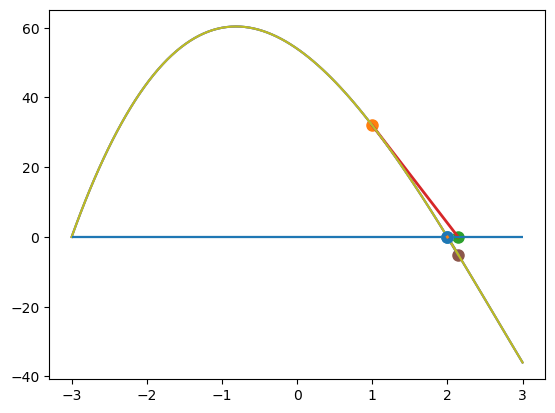

In [174]:
x0_1 = 1.0
xmin  = -3.0
xmax = 3.0

x1 =  np.linspace(xmin, xmax, 100)
y1 = f(x1)

fig1 = plt.figure(1)

ims = []

xp1=[] 
hp1=[]
xp1.append(x0_1)
    
for i in range(1,4):
    h_new = -f(xp1[i-1])/f_dot(xp1[i-1])
    x_new = xp1[i-1]+h_new
    hp1.append(h_new)
    xp1.append(x_new)
 
    im=plt.plot(x1, y1)
    im=plt.hlines([0], xmin, xmax) 
    im=plt.plot( xp1[i-1], f(xp1[i-1]), marker="o", markersize=8)
    im=plt.plot(x_new, 0, marker="o", markersize=8)
    im=plt.plot([xp1[i-1], x_new], [f(xp1[i-1]), 0], linewidth=2)
    ims.append(im)
        
ani = animation.ArtistAnimation(fig1, ims, interval=1000)
plt.show()

グラフをみるとわかる通り，解の一つである2に漸近している様子が確認できる．一方，初期値が
$$ x^{(0)} = -1.0 $$
のときは同様にプロットすると

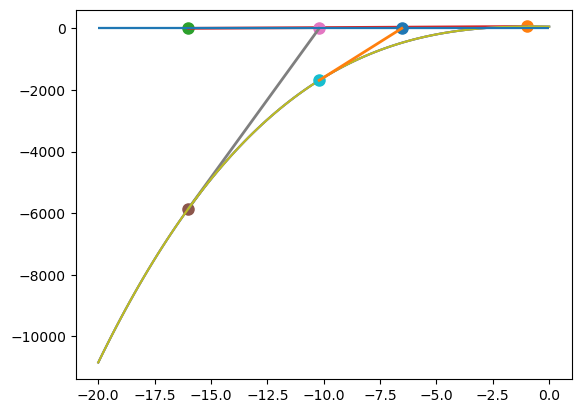

In [177]:
x0_2 = -1.0
xmin  = -20
xmax = 0

x2 =  np.linspace(xmin, xmax, 100)
y2 = f(x2)

fig2 = plt.figure(1)

ims = []

xp2=[] 
hp2=[]
xp2.append(x0_2)
    
for i in range(1,4):
    h_new = -f(xp2[i-1])/f_dot(xp2[i-1])
    x_new = xp2[i-1]+h_new
    hp2.append(h_new)
    xp2.append(x_new)
 
    im=plt.plot(x2, y2)
    im=plt.hlines([0], xmin, xmax) 
    im=plt.plot( xp2[i-1], f(xp2[i-1]), marker="o", markersize=8)
    im=plt.plot(x_new, 0, marker="o", markersize=8)
    im=plt.plot([xp2[i-1], x_new], [f(xp2[i-1]), 0], linewidth=2)
    ims.append(im)
        
ani = animation.ArtistAnimation(fig2, ims, interval=1000)
plt.show()

このように最初の点で-3.0を超えてしまったために何回繰り返しても解-3.0を得られなくなっている．初期値の選び方が大切であることがよくわかる内容となっていた．